In [1]:
import numpy as np, pandas as pd
import scipy
from scipy.stats import rankdata
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt

In [2]:
scipy.__version__

'1.7.1'

# A 2-dim random sample

In [3]:
n = 500

## Bivariate Normal

In [4]:
mean = [0,0] 
cov = [[1, 0], [0, 1]]
normal_sample = np.random.multivariate_normal(mean, cov, n)

## Bivariate Uniform

In [5]:
xy_min = [0, 0]
xy_max = [10, 10]
uniform_sample = np.random.uniform(low=xy_min, high=xy_max, size=(n,2))

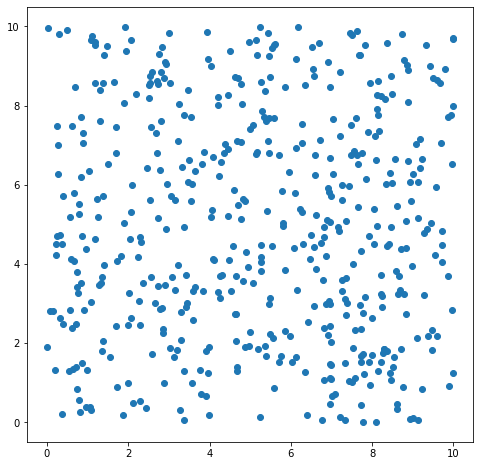

In [6]:
sample = uniform_sample
plt.rcParams["figure.figsize"] = (8,8)
plt.scatter(sample[:,0], sample[:,1])

# Calculate Pairwise Distances

In [7]:
N = len(sample)
distance_matrix = np.zeros([N, N])

for j in range(N):
    for i in range(N):
        distance_matrix[i,j] = (euclidean(sample[i], sample[j]))

distance_matrix

array([[0.        , 4.15471315, 2.61221458, ..., 3.13611671, 9.0670376 ,
        6.56678717],
       [4.15471315, 0.        , 4.01602935, ..., 1.15116806, 5.27112321,
        4.69800461],
       [2.61221458, 4.01602935, 0.        , ..., 3.60247444, 7.67815079,
        4.28813453],
       ...,
       [3.13611671, 1.15116806, 3.60247444, ..., 0.        , 6.41275886,
        5.3574876 ],
       [9.0670376 , 5.27112321, 7.67815079, ..., 6.41275886, 0.        ,
        4.43747037],
       [6.56678717, 4.69800461, 4.28813453, ..., 5.3574876 , 4.43747037,
        0.        ]])

In [8]:
# Replace diagonal with a large number to prevent trivial matching

M = np.max(distance_matrix)
np.fill_diagonal(distance_matrix, 2 * M)

In [9]:
distance_matrix[:5,:5]

array([[27.06411702,  4.15471315,  2.61221458,  8.90547439,  8.01722014],
       [ 4.15471315, 27.06411702,  4.01602935,  5.35134438,  4.97320421],
       [ 2.61221458,  4.01602935, 27.06411702,  7.30126771,  6.13584852],
       [ 8.90547439,  5.35134438,  7.30126771, 27.06411702,  1.49156971],
       [ 8.01722014,  4.97320421,  6.13584852,  1.49156971, 27.06411702]])

# A minimum distance non-bipartite matching on `sample`  

Equivalently, a linear sum assignment between `sample` and `sample`.  

To prevent a trivial matching (each element matching with itself), I have replaced the diagonal zeros with a large number.

In [10]:
# scipy.optimize.linear_sum_assignment

row, col = scipy.optimize.linear_sum_assignment(distance_matrix, maximize=False)

nonbipartite_matching = np.concatenate([[row], [col]]).T.tolist()

In [11]:
nonbipartite_matching

[[0, 15],
 [1, 255],
 [2, 52],
 [3, 381],
 [4, 59],
 [5, 64],
 [6, 226],
 [7, 120],
 [8, 340],
 [9, 264],
 [10, 168],
 [11, 29],
 [12, 195],
 [13, 441],
 [14, 67],
 [15, 32],
 [16, 353],
 [17, 101],
 [18, 145],
 [19, 355],
 [20, 425],
 [21, 354],
 [22, 189],
 [23, 197],
 [24, 88],
 [25, 315],
 [26, 107],
 [27, 131],
 [28, 401],
 [29, 11],
 [30, 477],
 [31, 326],
 [32, 0],
 [33, 41],
 [34, 49],
 [35, 113],
 [36, 257],
 [37, 424],
 [38, 228],
 [39, 318],
 [40, 109],
 [41, 408],
 [42, 351],
 [43, 177],
 [44, 175],
 [45, 220],
 [46, 55],
 [47, 346],
 [48, 243],
 [49, 34],
 [50, 395],
 [51, 147],
 [52, 2],
 [53, 233],
 [54, 418],
 [55, 303],
 [56, 263],
 [57, 374],
 [58, 414],
 [59, 157],
 [60, 415],
 [61, 473],
 [62, 76],
 [63, 435],
 [64, 5],
 [65, 417],
 [66, 411],
 [67, 14],
 [68, 89],
 [69, 316],
 [70, 106],
 [71, 472],
 [72, 461],
 [73, 178],
 [74, 150],
 [75, 365],
 [76, 121],
 [77, 104],
 [78, 66],
 [79, 240],
 [80, 296],
 [81, 469],
 [82, 135],
 [83, 482],
 [84, 171],
 [85, 348],
 

In most cases, the matching is symmetric - i.e., if `sample[i]` matches with `sample[j]`, then `sample[j]` matches with `sample[i]`. 

But in some cases, the matchings form triangles or polygons:

# Finding polygons

In [12]:
from collections import Counter 

In [13]:
sorted_matching = sorted([sorted(i) for i in nonbipartite_matching], key = lambda x: x[0])

count = Counter([tuple(i) for i in sorted_matching])

In [14]:
polygons = [list(t) for t in count if count[t] < 2]

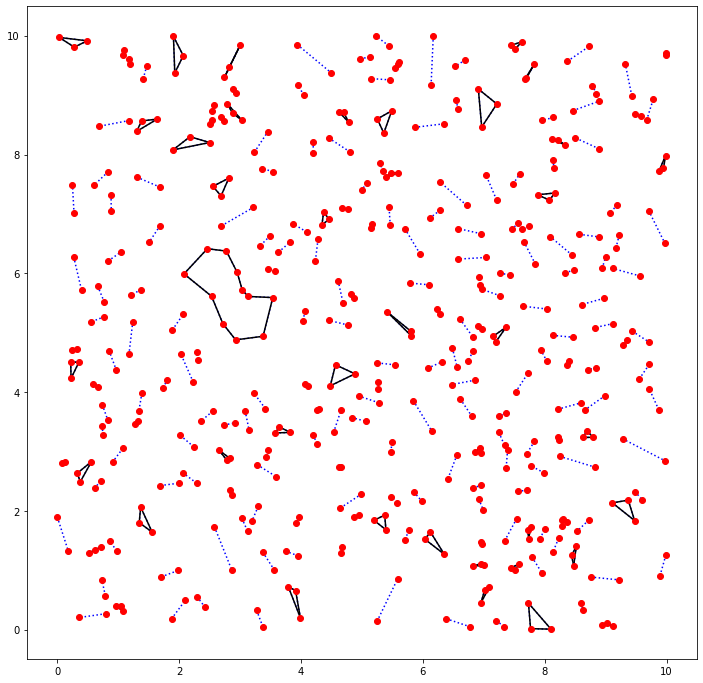

In [15]:
plt.rcParams["figure.figsize"] = (12,12)

for i in np.unique(sorted_matching, axis = 0):
    plt.plot(* sample[i].T, c = 'b', linestyle='dotted')
    
for i in polygons:
    plt.plot(* sample[i].T, c = 'k', linestyle='solid')

for p in sample:
    plt.plot(* p.T, marker = 'o', c = 'r')
    
plt.show()